In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train = '/content/drive/MyDrive/Cats_and_Dogs/train'
val =   '/content/drive/MyDrive/Cats_and_Dogs/val'
test =  '/content/drive/MyDrive/Cats_and_Dogs/test'

In [ ]:
img_width, img_height, channels = 150, 150, 3
input_shape = (img_width, img_height, channels)
batch_size = 32

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [ ]:
nb_train_samples = 20000 
nb_validation_samples = 2490 
nb_test_samples = 2500

In [ ]:
model = Sequential()
# Input layer
model.add(Input(shape=(150,150,3), batch_size=32))

# 1 layer
model.add(Conv2D(16,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2 layer
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3 layer
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# Dense layer
model.add(Dense(64, activation='relu'))

# Dropout
model.add(Dropout(0.5))

# Dense
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (32, 148, 148, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 74, 74, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 72, 72, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 36, 36, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 34, 34, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (32, 17, 17, 64)        

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-e0326844-cebb-80b0-0418-8cfa85c662de)


In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
625/625 [==============================] - 4827s 8s/step - loss: 0.6247 - accuracy: 0.6296 - val_loss: 0.5371 - val_accuracy: 0.7110
Epoch 2/10
625/625 [==============================] - 131s 210ms/step - loss: 0.5246 - accuracy: 0.7451 - val_loss: 0.4517 - val_accuracy: 0.7886
Epoch 3/10
625/625 [==============================] - 138s 221ms/step - loss: 0.4568 - accuracy: 0.7911 - val_loss: 0.4319 - val_accuracy: 0.7930
Epoch 4/10
625/625 [==============================] - 132s 211ms/step - loss: 0.4129 - accuracy: 0.8164 - val_loss: 0.4064 - val_accuracy: 0.8133
Epoch 5/10
625/625 [==============================] - 132s 211ms/step - loss: 0.3744 - accuracy: 0.8377 - val_loss: 0.3903 - val_accuracy: 0.8194
Epoch 6/10
625/625 [==============================] - 132s 211ms/step - loss: 0.3342 - accuracy: 0.8533 - val_loss: 0.4120 - val_accuracy: 0.8190
Epoch 7/10
625/625 [==============================] - 132s 212ms/step - loss: 0.2972 - accuracy: 0.8745 - val_loss: 0.3925 - v

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 83.21%


In [ ]:
loss = [0.6247, 0.5246, 0.4568, 0.4129, 0.3744, 0.3342, 0.2972, 0.2582, 0.2261, 0.1979]
val_loss = [0.5371, 0.4517, 0.4319, 0.3903, 0.4120, 0.3925, 0.4039, 0.3968, 0.4684]
acc = [0.6296, 0.7451, 0.7911, 0.8164, 0.8377, 0.8533, 0.8745, 0.8903, 0.9028, 0.9155]
val_acc = [0.7110, 0.7886, 0.7930, 0.8133, 0.8194, 0.8190, 0.8141, 0.8352, 0.8364, 0.8364]

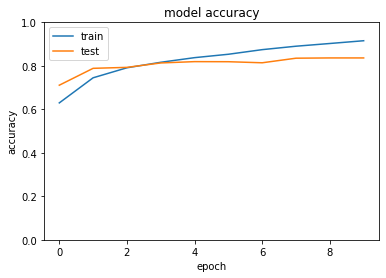

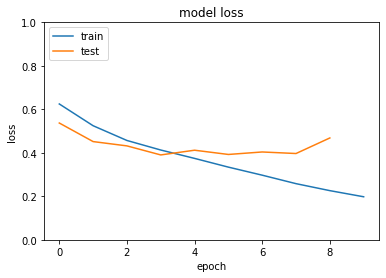

In [ ]:
import matplotlib.pyplot as plt
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we can see, model is a little bit overfitter, because accuracy on train is much better than accuracy on test

In [ ]:
vgg16_net = VGG16(weights='imagenet', 
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()         

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
model = Sequential()
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5), 
              metrics=['accuracy'])

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
625/625 [==============================] - 151s 241ms/step - loss: 0.4534 - accuracy: 0.7811 - val_loss: 0.3186 - val_accuracy: 0.8661
Epoch 2/10
625/625 [==============================] - 155s 247ms/step - loss: 0.3118 - accuracy: 0.8652 - val_loss: 0.2731 - val_accuracy: 0.8912
Epoch 3/10
625/625 [==============================] - 153s 245ms/step - loss: 0.2749 - accuracy: 0.8845 - val_loss: 0.2559 - val_accuracy: 0.8981
Epoch 4/10
625/625 [==============================] - 146s 233ms/step - loss: 0.2503 - accuracy: 0.8972 - val_loss: 0.2394 - val_accuracy: 0.9054
Epoch 5/10
625/625 [==============================] - 150s 240ms/step - loss: 0.2374 - accuracy: 0.9002 - val_loss: 0.2315 - val_accuracy: 0.9091
Epoch 6/10
625/625 [==============================] - 141s 225ms/step - loss: 0.2271 - accuracy: 0.9054 - val_loss: 0.2260 - val_accuracy: 0.9123
Epoch 7/10
625/625 [==============================] - 145s 231ms/step - loss: 0.2177 - accuracy: 0.9104 - val_loss: 0.2201 -

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Accuracy on test data: 89.38%


In [ ]:
loss = [0.4534, 0.3118, 0.2749, 0.2503, 0.2374, 0.2271, 0.2177, 0.2102, 0.2016, 0.1954]
val_loss = [0.3186, 0.2731, 0.2559, 0.2394, 0.2315, 0.2260, 0.2201, 0.2193, 0.2151, 0.2117]
acc = [0.7811, 0.8652, 0.8845, 0.8972, 0.9002, 0.9054, 0.9104, 0.9153, 0.9175, 0.9211 ]
val_acc =  [0.8661, 0.8912, 0.8981, 0.9054, 0.9104, 0.9123, 0.9192, 0.9205, 0.9221, 0.9225]

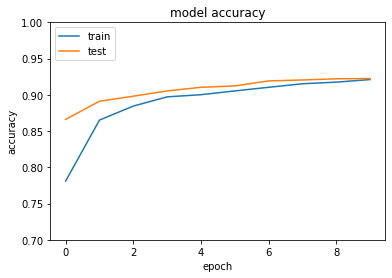

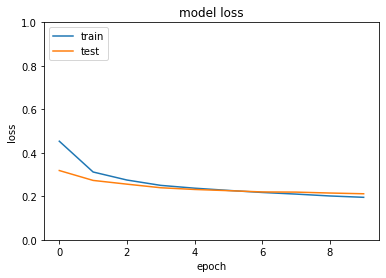

In [ ]:
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0.7,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we see, model is not overfitted, so probably we could make more training epochs to achieve better test accuracy. 